In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential, Model                                             # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
# Display images using OpenCV

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Google drive to access the dataset (monkeys_dataset.zip)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Part 1. 1 a - Import and read ‘images.npy’.

In [ ]:
images = np.load('/content/drive/My Drive/Python Course/images.npy',allow_pickle=True)

In [ ]:
print(images.shape)


(409, 2)


In [ ]:
print(images[1][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527}, {'x': 0.7692307692307693, 'y': 0.36182902584493043}], 'imageWidth': 1280, 'imageHeight': 697}]


<function matplotlib.pyplot.show(close=None, block=None)>

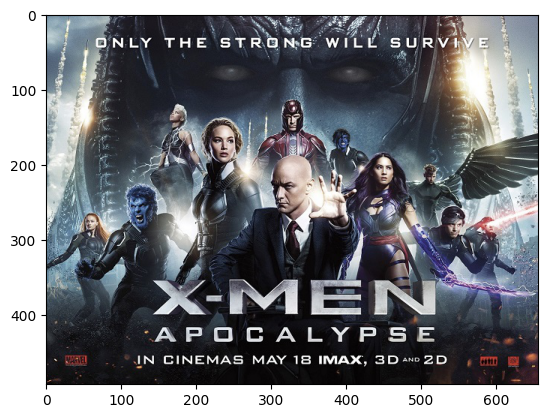

In [ ]:
plt.imshow(images[408][0])
plt.show

In [ ]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = 224


B. Split the data into Features(X) & labels(Y). Unify shape of all the images.

In [ ]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

Y = np.zeros((int(images.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(images.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(images.shape[0]):
    img = images[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in images[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        Y[index][y1:y2, x1:x2] = 1

print(X.shape)
print(Y.shape)


(409, 224, 224, 3)
(409, 224, 224)


C. Split the data into train and test[400:9]. [1 Marks]


In [ ]:
X_train = X[:400]
y_train = Y[:400]

print(X_train.shape)
print(y_train.shape)

(400, 224, 224, 3)
(400, 224, 224)


In [ ]:
X_test = X[400:]
y_test = Y[400:]

print(X_train.shape)
print(y_train.shape)

(400, 224, 224, 3)
(400, 224, 224)


D. Select random image from the train data and display original image and masked image.

Image array: [[[-0.50588238  0.25490201  0.59215689]
  [-0.50588238  0.25490201  0.59215689]
  [-0.50588238  0.25490201  0.59215689]
  ...
  [-0.21568626  0.33333337  0.67843139]
  [-0.23921567  0.32549024  0.67058825]
  [-0.26274508  0.30980396  0.66274512]]

 [[-0.50588238  0.25490201  0.59215689]
  [-0.50588238  0.25490201  0.59215689]
  [-0.50588238  0.25490201  0.59215689]
  ...
  [-0.19215685  0.35686278  0.7019608 ]
  [-0.21568626  0.34117651  0.68627453]
  [-0.23921567  0.33333337  0.67058825]]

 [[-0.50588238  0.25490201  0.59215689]
  [-0.50588238  0.25490201  0.59215689]
  [-0.50588238  0.25490201  0.59215689]
  ...
  [-0.15294117  0.38823533  0.71764708]
  [-0.18431371  0.37254906  0.7019608 ]
  [-0.21568626  0.35686278  0.68627453]]

 ...

 [[ 0.6156863   0.78823531  0.89019608]
  [ 0.6156863   0.78823531  0.89019608]
  [ 0.6156863   0.78823531  0.89019608]
  ...
  [-0.56078434 -0.33333331 -0.02745098]
  [-0.56078434 -0.34901959 -0.02745098]
  [-0.52941179 -0.32549018  0.0

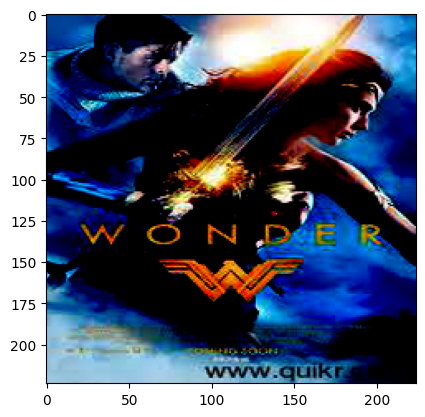

In [ ]:
import matplotlib.pyplot as plt

n = 9
print("Image array:", X_train[n])
plt.imshow(X_train[n])

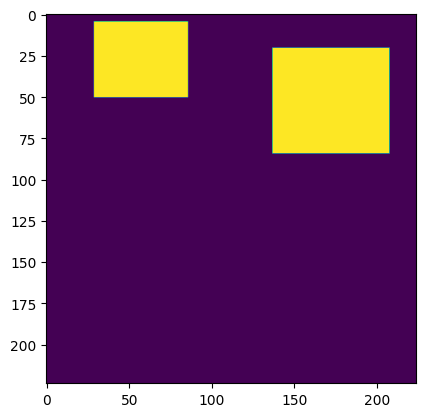

In [ ]:
plt.imshow(Y[n])

Image array: [[[ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  ...
  [ 0.59215689  0.68627453 -0.08235294]
  [ 0.49019611  0.57647061 -0.17647058]
  [ 0.51372552  0.60784316 -0.13725489]]

 [[ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  ...
  [ 0.65490198  0.74117649 -0.01960784]
  [ 0.54509807  0.63921571 -0.14509803]
  [ 0.47450984  0.56862748 -0.23921567]]

 [[ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  ...
  [ 0.7647059   0.82745099  0.05098045]
  [ 0.58431375  0.67058825 -0.18431371]
  [ 0.34117651  0.45098042 -0.48235291]]

 ...

 [[ 0.34117651  0.34117651  0.41960788]
  [ 0.52941179  0.52941179  0.60784316]
  [ 0.28627455  0.28627455  0.34901965]
  ...
  [ 0.14509809 -0.10588235 -0.09803921]
  [-0.69411767 -0.62352943 -0.4588235 ]
  [-0.89019608 -0.74117649 -0.4

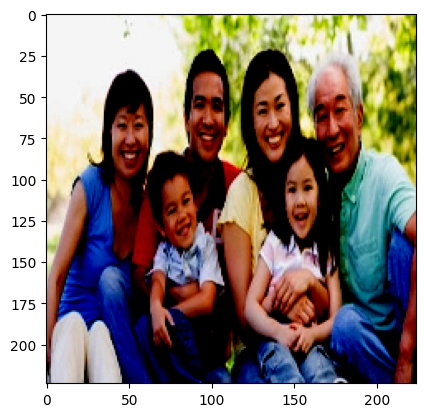

In [ ]:
n = 4
print("Image array:", X_train[n])
plt.imshow(X_train[n])


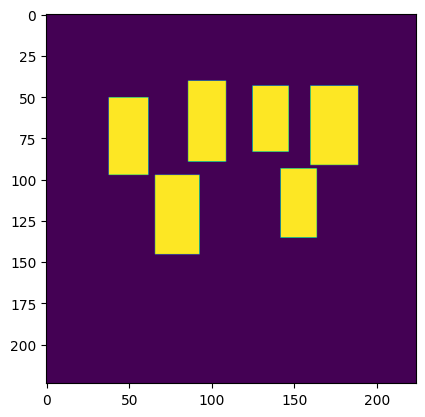

In [ ]:
plt.imshow(Y[n])

Image array: [[[-0.08235294 -0.25490195 -0.44313723]
  [-0.15294117 -0.32549018 -0.51372552]
  [-0.34117645 -0.51372552 -0.7019608 ]
  ...
  [ 0.41176474  0.3176471   0.19215691]
  [ 0.41176474  0.3176471   0.19215691]
  [ 0.41176474  0.3176471   0.19215691]]

 [[-0.20784312 -0.38039213 -0.56862748]
  [-0.21568626 -0.38823527 -0.57647061]
  [-0.01960784 -0.19215685 -0.38039213]
  ...
  [ 0.45098042  0.36470592  0.22352946]
  [ 0.45098042  0.36470592  0.22352946]
  [ 0.45098042  0.36470592  0.22352946]]

 [[-0.12941176 -0.31764704 -0.50588238]
  [-0.17647058 -0.36470586 -0.5529412 ]
  [-0.05098039 -0.24705881 -0.43529409]
  ...
  [ 0.48235297  0.38039219  0.24705887]
  [ 0.49019611  0.38823533  0.25490201]
  [ 0.49019611  0.38823533  0.25490201]]

 ...

 [[-0.372549   -0.57647061 -0.81176472]
  [-0.39607841 -0.60000002 -0.83529413]
  [-0.44313723 -0.64705884 -0.88235295]
  ...
  [-0.18431371 -0.39607841 -0.63137257]
  [-0.19215685 -0.40392154 -0.63921571]
  [-0.28627449 -0.48235291 -0.7

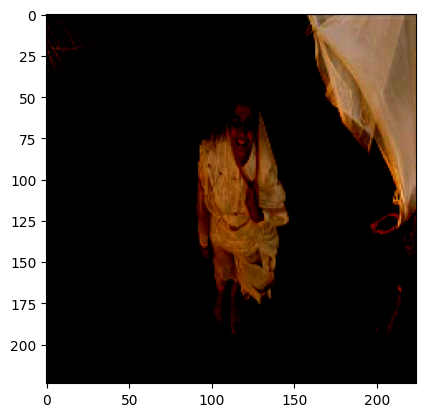

In [ ]:
n = 25
print("Image array:", X_train[n])
plt.imshow(X_train[n])

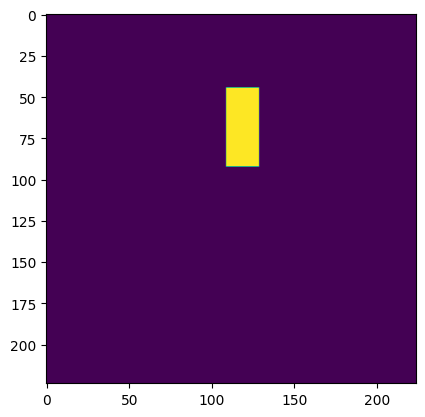

In [ ]:
plt.imshow(Y[n])

Image array: [[[-1.         -0.99215686 -1.        ]
  [-1.         -0.99215686 -1.        ]
  [-1.         -0.99215686 -1.        ]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-1.         -0.99215686 -1.        ]
  [-1.         -0.99215686 -1.        ]
  [-1.         -0.99215686 -1.        ]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-1.         -0.99215686 -1.        ]
  [-1.         -0.99215686 -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1. 

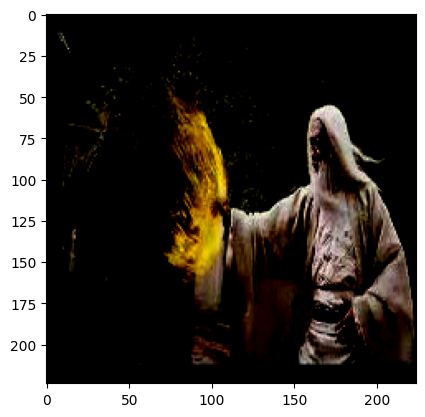

In [ ]:
n = 60
print("Image array:", X_train[n])
plt.imshow(X_train[n])

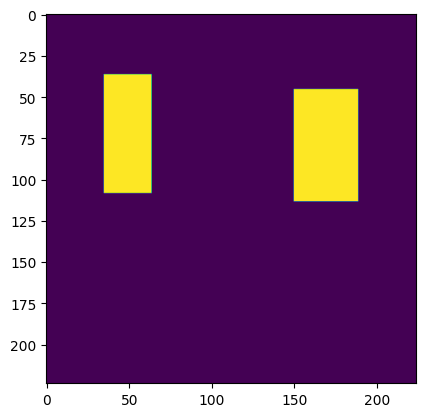

In [ ]:
plt.imshow(Y[n])

2. Model building
A. Design a face mask detection model.

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable

    #### Add your code here ####
    block1 = model.get_layer("conv_pw_1_relu").output ### Output shape of (112, 112, 32)
    block2 = model.get_layer("conv_pw_3_relu").output ### Output shape of (56, 56, 128)
    block3 = model.get_layer("conv_pw_5_relu").output ### Output shape of (28, 28, 256)
    block4 = model.get_layer("conv_pw_11_relu").output ### Output shape of (14, 14, 512)
    block5 = model.get_layer("conv_pw_13_relu").output ### Output shape of (7, 7, 1024)

    x = Concatenate()([UpSampling2D()(block5), block4]) ### U-NET layer upsampling from (7, 7, 1024) to (14, 14, 1536)
    x = Concatenate()([UpSampling2D()(x), block3]) ### U-NET layer upsampling from (14, 14, 1536) to (28, 28, 1792)
    x = Concatenate()([UpSampling2D()(x), block2]) ### U-NET layer upsampling from (28, 28, 1792) to (56, 56, 1920)
    x = Concatenate()([UpSampling2D()(x), block1]) ### U-NET layer upsampling from (56, 56, 1920) to (112, 112, 198)
    x = UpSampling2D()(x) ### U-NET layer upsampling from (112, 112, 198) to (224, 224, 198)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs=model.input, outputs = x)

In [ ]:
model = create_model()


17225924/17225924 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)         128       ['conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['conv1_bn[0][0]']        

B. Design your own Dice Coefficient and Loss function.

In [ ]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

In [ ]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define ModelCheckpoint callback with save_freq
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq='epoch')

# Define other callbacks
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

C. Train and tune the model as required.

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1, callbacks = [checkpoint, reduce_lr, stop], validation_split=0.15)


Epoch 1/10
340/340 [==============================] - ETA: 0s - loss: 0.3655 - dice_coefficient: 0.3480
Epoch 1: loss improved from inf to 0.36547, saving model to model-0.37.h5
340/340 [==============================] - 654s 2s/step - loss: 0.3655 - dice_coefficient: 0.3480 - val_loss: 0.2939 - val_dice_coefficient: 0.3332 - lr: 1.0000e-04
Epoch 2/10
340/340 [==============================] - ETA: 0s - loss: 0.1821 - dice_coefficient: 0.5295
Epoch 2: loss improved from 0.36547 to 0.18208, saving model to model-0.18.h5
340/340 [==============================] - 657s 2s/step - loss: 0.1821 - dice_coefficient: 0.5295 - val_loss: 0.2458 - val_dice_coefficient: 0.4098 - lr: 1.0000e-04
Epoch 3/10
340/340 [==============================] - ETA: 0s - loss: 0.1490 - dice_coefficient: 0.5812
Epoch 3: loss improved from 0.18208 to 0.14896, saving model to model-0.15.h5
340/340 [==============================] - 641s 2s/step - loss: 0.1490 - dice_coefficient: 0.5812 - val_loss: 0.2346 - val_dice_

D. Evaluate and share insights on performance of the model.

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

# Evaluate model on test data
loss, dice_coefficient = model.evaluate(X_test, y_test, verbose=0)

# Predict masks on test data
predicted_masks = model.predict(X_test)

# Flatten masks and predicted masks
test_masks_flat = y_test.flatten()
predicted_masks_flat = predicted_masks.flatten()

# Compute confusion matrix
conf_matrix = confusion_matrix(test_masks_flat, predicted_masks_flat.round())

# Compute precision, recall, and F1-score
precision = precision_score(test_masks_flat, predicted_masks_flat.round())
recall = recall_score(test_masks_flat, predicted_masks_flat.round())
f1 = f1_score(test_masks_flat, predicted_masks_flat.round())

print("Quantitative Evaluation:")
print(f"Loss: {loss}")
print(f"Dice Coefficient: {dice_coefficient}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

1/1 [==============================] - 4s 4s/step
Quantitative Evaluation:
Loss: 0.18327851593494415
Dice Coefficient: 0.5740484595298767
Precision: 0.8007180747832837
Recall: 0.5105702794678767
F1-score: 0.6235437840833239
Confusion Matrix:
[[396938   6161]
 [ 23730  24755]]


The model achieves a relatively low loss of 0.183 and a moderate Dice coefficient of 0.574. These metrics indicate that the model's predictions are generally close to the ground truth masks, with a reasonable level of overlap.


The precision of 0.801 suggests that when the model predicts a face with a mask, it is correct around 80% of the time. However, the recall of 0.511 indicates that the model misses detecting around 49% of actual faces with masks. This imbalance between precision and recall suggests potential room for improvement.


The F1-score, which balances precision and recall, is 0.624. While this indicates a reasonable overall performance, it also reflects the trade-off between precision and recall.


The model demonstrates a relatively high precision, indicating that it correctly identifies faces with masks most of the time.


The Dice coefficient suggests a reasonable level of agreement between predicted and true masks, indicating that the model captures the spatial characteristics of faces with masks to some extent.


These are the cases where the model correctly predicts faces with masks. In this case, there are 24,755 true positive predictions, indicating that the model successfully identified these instances.


These are the cases where the model correctly predicts background pixels (i.e., no face with mask). There are 396,938 true negative predictions, suggesting that the model accurately identifies regions without faces with masks.

In [ ]:
preds_test = model.predict(X_test, verbose=1)


1/1 [==============================] - 9s 9s/step


3. Test the model predictions on the test image: ‘image with index 3 in the test data’ and visualise the predicted masks on the faces in the image.

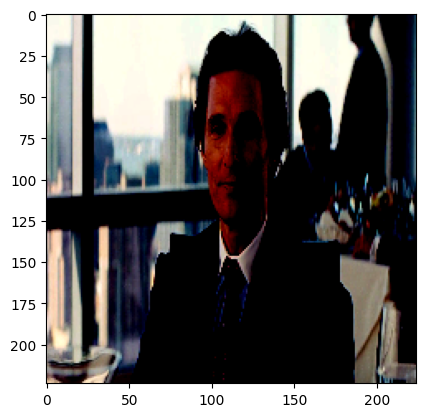

In [ ]:
plt.imshow(X_test[3])

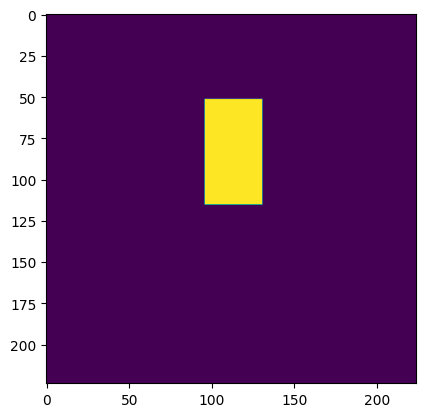

In [ ]:
plt.imshow(y_test[3])


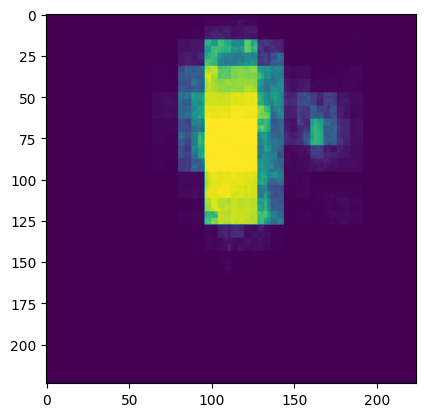

In [ ]:
plt.imshow(preds_test[3])


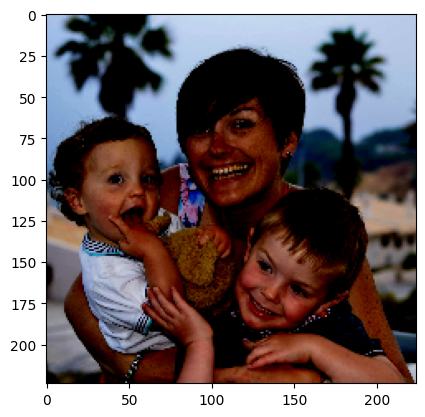

In [ ]:
plt.imshow(X_test[0])

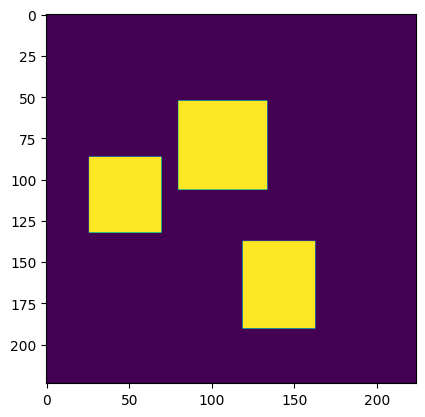

In [ ]:
plt.imshow(y_test[0])

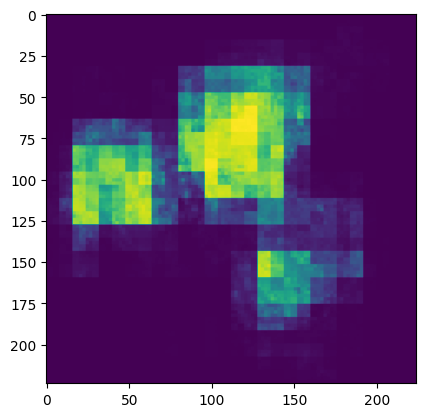

In [ ]:
plt.imshow(preds_test[0])

1. Read/import images from folder ‘training_images’. [2 Marks]


In [ ]:
import os
import cv2

# Path to the folder containing the images
folder_path = '/content/drive/My Drive/Python Course/training_images/'

# Initialize lists to store images and their filenames
images = []
filenames = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        # Read the image using OpenCV
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        # Append the image and filename to the respective lists
        images.append(img)
        filenames.append(filename)

# Convert the lists to numpy arrays for further processing if needed
images = np.array(images)

2. Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images. [3 Marks]


In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

# Path to the folder containing training images
folder_path = '/content/drive/My Drive/Python Course/training_images/'

# Load the pre-trained face detection classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image file
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        # Read the image
        image_path = os.path.join(folder_path, filename)
        img = cv2.imread(image_path)

        # Convert the image to grayscale for face detection
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Draw rectangles around the detected faces
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Display the image with detected faces
        cv2_imshow(img)

3. From the same loop above, extract metadata of the faces and write into a DataFrame. [3 Marks]

In [ ]:
import cv2
import os
import pandas as pd

# Path to the folder containing training images
folder_path = '/content/drive/My Drive/Python Course/training_images/'

# Load the pre-trained face detection classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Create an empty DataFrame to store face metadata
face_data = pd.DataFrame(columns=['Image', 'Total Faces', 'Face Index', 'X', 'Y', 'Width', 'Height'])

# Initialize face index
face_index = 0

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image file
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        # Read the image
        image_path = os.path.join(folder_path, filename)
        img = cv2.imread(image_path)

        # Convert the image to grayscale for face detection
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Store total faces count for the current image
        total_faces = len(faces)

        # Iterate through detected faces and store metadata in DataFrame
        for (x, y, w, h) in faces:
            face_data = face_data.append({'Image': filename, 'Total Faces': total_faces, 'Face Index': face_index, 'X': x, 'Y': y, 'Width': w, 'Height': h}, ignore_index=True)
            face_index += 1

# Display the DataFrame containing face metadata
print(face_data)

              Image Total Faces Face Index    X    Y Width Height
0    real_01059.jpg           1          0   39  129   409    409
1    real_01030.jpg           1          1  150  161   384    384
2    real_00983.jpg           1          2   85   89   472    472
3    real_01009.jpg           1          3  125  153   412    412
4    real_00982.jpg           1          4   18   92   458    458
..              ...         ...        ...  ...  ...   ...    ...
944  real_00999.jpg           1        944   92  104   425    425
945  real_01007.jpg           1        945   74   54   464    464
946  real_00987.jpg           1        946   47  123   417    417
947  real_00968.jpg           1        947   36   82   441    441
948  real_01024.jpg           1        948   52   57   511    511

[949 rows x 7 columns]


4. Save the output Dataframe in .csv format. [2 Marks]


In [ ]:
from google.colab import files

utput_csv_file = 'face_metadata.csv'
face_data.to_csv(output_csv_file, index=False)

print("DataFrame saved to", output_csv_file)

files.download(output_csv_file)

DataFrame saved to face_metadata.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>